In [2]:
import os
# reduce number of threads
os.environ['TF_NUM_INTEROP_THREADS'] = '1'
os.environ['TF_NUM_INTRAOP_THREADS'] = '1'
import tensorflow

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import pandas as pd
import matplotlib.pyplot as plt

2022-07-27 06:53:10.030431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/viktor_petukhov/local/miniconda3/lib/:/home/viktor_petukhov/local/lib/:/home/viktor_petukhov/local/lib64/:/home/viktor_petukhov/local/miniconda3/lib/:/home/viktor_petukhov/local/lib/:/home/viktor_petukhov/local/lib64/:/home/viktor_petukhov/local/miniconda3/lib/:/home/viktor_petukhov/local/lib/:/home/viktor_petukhov/local/lib64/:
2022-07-27 06:53:10.030473: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [52]:
# df = pd.read_csv("/d0-mendel/home/viktor_petukhov/projects/cacoaAnalysis/cache/pf_counts.csv")
df = pd.read_csv("/d0-mendel/home/viktor_petukhov/projects/cacoaAnalysis/cache/coda_sim_df.csv")

/home/viktor_petukhov/.virtualenvs/r-benchmarks/lib/python3.9/site-packages/sccoda/util/cell_composition_data.py:294: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return ad.AnnData(X=count_data.values,


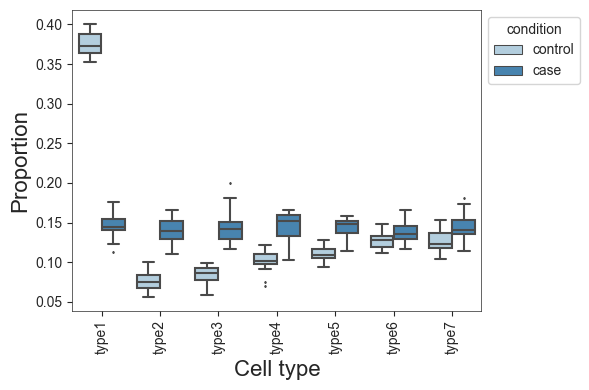

In [53]:
data_all = dat.from_pandas(df, covariate_columns=["condition"])

viz.boxplots(data_all, feature_name="condition")
plt.show()

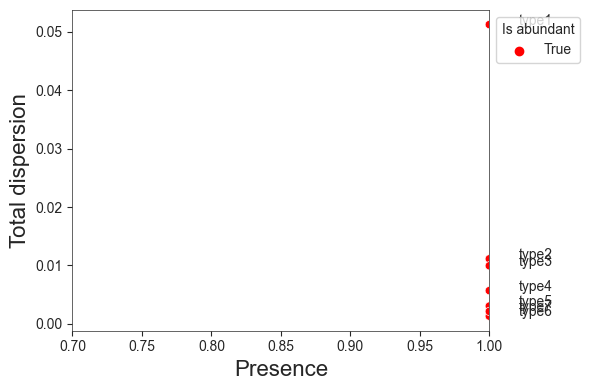

In [54]:
viz.rel_abundance_dispersion_plot(
    data=data_all,
    abundant_threshold=0.9, 
)
plt.xlim(0.7, 1.0); #plt.ylim(0, 0.1)
plt.show()

In [55]:
model = mod.CompositionalAnalysis(data_all, formula="condition", reference_cell_type="type7") # Ciliated
sim_results = model.sample_hmc()

100%|██████████| 20000/20000 [03:19<00:00, 100.03it/s]


MCMC sampling finished. (246.615 sec)
Acceptance rate: 64.8%


In [56]:
res_df = sim_results.intercept_df.copy()

In [57]:
res_df["credible_effect"] = sim_results.credible_effects()

In [62]:
sim_results.set_fdr(est_fdr=0.05)
sim_results.credible_effects()

Covariate             Cell Type
condition[T.control]  type1         True
                      type2         True
                      type3         True
                      type4         True
                      type5         True
                      type6        False
                      type7        False
Name: Final Parameter, dtype: bool

In [60]:
eff_df = sim_results.summary_prepare()[1]
eff_df.sort_values("Inclusion probability", ascending=False)

Final Parameter  HDI 3%  HDI 97%     SD  \
Covariate            Cell Type                                            
condition[T.control] type1             1.069247   0.956    1.170  0.058   
                     type2            -0.484436  -0.620   -0.357  0.070   
                     type3            -0.406058  -0.532   -0.280  0.067   
                     type4            -0.227390  -0.340   -0.108  0.072   
                     type5            -0.148478  -0.271   -0.030  0.082   
                     type6             0.000000  -0.043    0.205  0.041   
                     type7             0.000000   0.000    0.000  0.000   

                                Inclusion probability  Expected Sample  \
Covariate            Cell Type                                           
condition[T.control] type1                   1.000000       140.986588   
                     type2                   1.000000        28.731139   
                     type3                   1.000000        31.860247   
                     type4                   0.972533        38.245552   
                     type5                   0.791267        40.851345   
                     type6                   0.178200        46.544897   
                     type7                   0.000000        47.580232   

                                log2-fold change  
Covariate            Cell Type                    
condition[T.control] type1              1.369305  
                     type2             -0.872187  
                     type3             -0.759112  
                     type4             -0.501348  
                     type5             -0.387501  
                     type6             -0.173293  
                     type7             -0.173293